In [3]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
f = open("hurriyet.txt","r", encoding="utf8")

In [5]:
text = f.read()

In [6]:
t_list = text.split("\n")

In [7]:
corpus = []

In [8]:
for cumle in t_list:
    corpus.append(cumle.split())

In [9]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [10]:
model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1)

In [12]:
model.wv["ankara"]

array([-1.47831783e-01,  1.26143500e-01, -1.51646801e-03, -8.85265693e-02,
       -2.02149332e-01,  2.35153019e-01, -1.41107544e-01,  3.47706497e-01,
        4.22375023e-01, -3.50144058e-01,  1.84843302e-01,  3.47238183e-01,
       -5.06083071e-01,  2.16574338e-03, -1.03024513e-01,  6.62360787e-01,
        1.14605360e-01, -4.10759211e-01,  8.07409585e-01,  1.18538462e-01,
        2.98085898e-01,  5.59372716e-02,  3.31067920e-01, -1.57847613e-01,
       -5.60927212e-01,  3.73941613e-04, -3.60632122e-01,  3.57693583e-01,
        8.43735635e-02,  9.85041633e-02,  5.68210363e-01, -3.14605758e-02,
       -1.02583049e-02, -1.86094165e-01, -5.10039508e-01, -1.54546827e-01,
       -2.37845793e-01,  4.81205910e-01,  1.88154295e-01, -2.35826060e-01,
        4.78793941e-02,  4.41067576e-01, -6.27792254e-02, -3.68802309e-01,
       -2.77533501e-01, -4.14948851e-01,  2.61941761e-01,  4.48337674e-01,
       -4.97352690e-01, -8.03437650e-01, -1.51657909e-01, -1.62897017e-02,
       -4.41274196e-01, -

In [26]:
model.wv.most_similar("youtube")

[('twitter', 0.7380863428115845),
 ('facebook', 0.7258562445640564),
 ('video', 0.7242610454559326),
 ('twıtter', 0.7105932235717773),
 ('paylaşım', 0.7053908109664917),
 ('internete', 0.7049703598022461),
 ('sosyalleşme', 0.6967669129371643),
 ('sitelerine', 0.692643404006958),
 ('whatsapp', 0.6912022233009338),
 ('sayfasına', 0.6819707155227661)]

In [40]:
model.save("word2vec.model")

In [41]:
model = Word2Vec.load("word2vec.model")

In [46]:
def closestwords_tsneplot(model, word):
    
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
    
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:,0]
    y_coords = Y[:,1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y),xytext=(5, -2), textcoords="offset points")
        
    

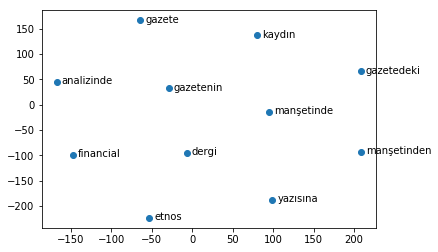

In [57]:
closestwords_tsneplot(model, "gazete")

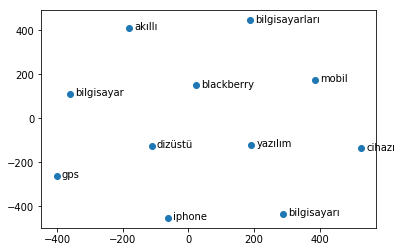

In [58]:
closestwords_tsneplot(model, "bilgisayar")

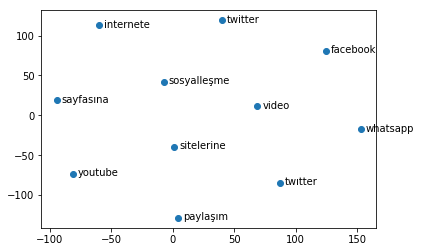

In [59]:
closestwords_tsneplot(model, "youtube")